In [52]:
#library
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.patches as mpatches
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
#from nltk.stem import PorterStemmer
from collections import Counter
from nltk.corpus import stopwords


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [53]:
df=pd.read_csv('EdX.csv')

In [54]:
df.head()

,Name,University,Difficulty Level,Link,About,Course Description
0,How to Learn Online,edX,Beginner,https://www.edx.org/course/how-to-learn-online,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,Beginner,https://www.edx.org/course/programming-for-eve...,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,Beginner,https://www.edx.org/course/cs50s-introduction-...,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,Intermediate,https://www.edx.org/course/the-analytics-edge,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",Beginner,https://www.edx.org/course/marketing-analytics...,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                720 non-null    object
 1   University          720 non-null    object
 2   Difficulty Level    720 non-null    object
 3   Link                720 non-null    object
 4   About               720 non-null    object
 5   Course Description  720 non-null    object
dtypes: object(6)
memory usage: 33.9+ KB


In [56]:
del df['Link']

In [57]:
df['Difficulty Level'] = df['Difficulty Level'].astype('category')
df['Difficulty Level'] = df['Difficulty Level'].cat.codes
df.head()

,Name,University,Difficulty Level,About,Course Description
0,How to Learn Online,edX,1,Learn essential strategies for successful onli...,"Designed for those who are new to elearning, t..."
1,Programming for Everybody (Getting Started wit...,The University of Michigan,1,"This course is a ""no prerequisite"" introductio...",This course aims to teach everyone the basics ...
2,CS50's Introduction to Computer Science,Harvard University,1,An introduction to the intellectual enterprise...,"This is CS50x , Harvard University's introduct..."
3,The Analytics Edge,Massachusetts Institute of Technology,2,"Through inspiring examples and stories, discov...","In the last decade, the amount of data availab..."
4,Marketing Analytics: Marketing Measurement Str...,"University of California, Berkeley",1,This course is part of a MicroMasters® Program,Begin your journey in a new career in marketin...


In [58]:
df.dtypes

,0
Name,object
University,object
Difficulty Level,int8
About,object
Course Description,object


In [59]:
df['University'].value_counts()

,count
University,
Harvard University,91
Massachusetts Institute of Technology,41
Delft University of Technology,28
The University of Queensland,25
IBM,21
...,...
University of Oxford,1
University of Toronto,1
"University System of Maryland-The University of Maryland, College Park",1


<Axes: xlabel='Difficulty Level', ylabel='University'>

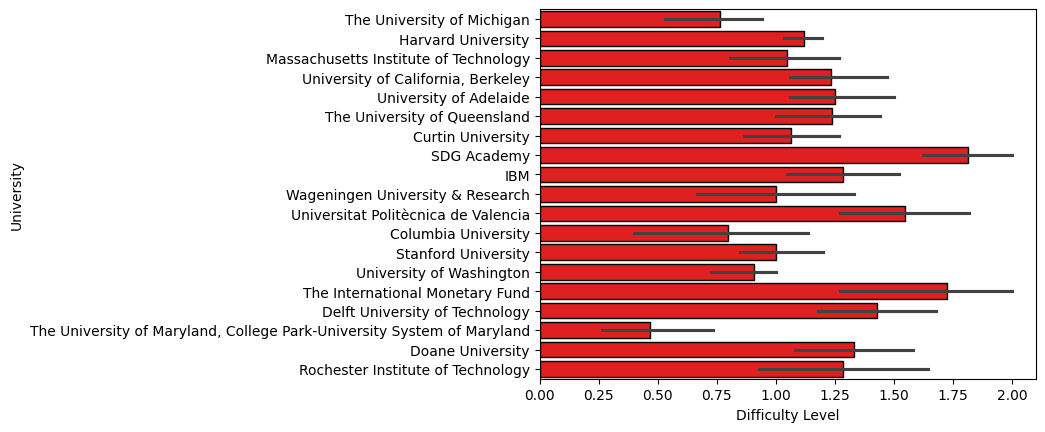

In [60]:
sns.barplot(
    x='Difficulty Level',
    y='University',
    data=df[df.groupby('University')['University'].transform('count') > 10],
    color='red',
    edgecolor='black'
)

In [61]:
lemma = WordNetLemmatizer()

def clean(text):
    #we just need words
    text = re.sub(r"[^A-Za-z0-9\s]", "", text)
    #lower text
    text = text.lower()
    #tokenizing
    tokens = word_tokenize(text)
    clean_list = [lemma.lemmatize(token) for token in tokens if token not in stop_words]
    return " ".join(clean_list)


#Cleaning for course description column
df['cleaned_course_description'] = df['Course Description'].apply(clean)
df['cleaned_about'] = df['About'].apply(clean)

In [62]:
def tf(overview):
    overview_words = overview.split()


    #counting the freq
    overview_words = Counter(overview_words)

    vector_length = sum(((1 + np.log10(count)) ** 2) for count in overview_words.values()) ** 0.5

    #tf calculating
    words_dicts = {word: (1 + np.log10(count)) / vector_length for word, count in overview_words.items()}

    return words_dicts

# tf for 'cleaned_course_description'
df['TF_cleaned_desc'] = df['cleaned_course_description'].apply(tf)

#result
print(df[['Name', 'cleaned_course_description', 'TF_cleaned_desc']].head())


                                                Name  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                          cleaned_course_description  \
0  designed new elearning course prepare strategy...   
1  course aim teach everyone basic programming co...   
2  cs50x harvard university introduction intellec...   
3  last decade amount data available organization...   
4  begin journey new career marketing analytics l...   

                                     TF_cleaned_desc  
0  {'designed': 0.15150255238911867, 'new': 0.151...  
1  {'course': 0.275910348190174, 'aim': 0.1495369...  
2  {'cs50x': 0.11824913903740496, 'harvard': 0.10...  
3  {'last': 0.08643054223627955, 'decade': 0.0864...  
4  {'begin': 0.11164194431008269, 'journey': 0.11..

In [63]:
def tf(overview):
    overview_words = overview.split()
    overview_words = Counter(overview_words)

    vector_length = sum(((1 + np.log10(count)) ** 2) for count in overview_words.values()) ** 0.5

    words_dicts = {word: (1 + np.log10(count)) / vector_length for word, count in overview_words.items()}

    return words_dicts

def create_tf_matrix(df):
    # Bu fonksiyon, her bir kurs açıklaması için TF'yi hesaplayıp, vektör haline getiriyor
    tf_matrix = []
    all_words = set()

    # İlk olarak tüm kurs açıklamalarındaki kelimeleri toplayalım
    for description in df['cleaned_course_description']:
        tf_dict = tf(description)
        all_words.update(tf_dict.keys())

    # Tüm kelimeleri içeren bir sıralama yapalım
    all_words = list(all_words)

    # Şimdi her kurs açıklaması için TF'yi hesaplayalım ve vektöre dönüştürelim
    for description in df['cleaned_course_description']:
        tf_dict = tf(description)
        vector = [tf_dict.get(word, 0) for word in all_words]  # her kelime için TF değerini al
        tf_matrix.append(vector)

    return np.array(tf_matrix), all_words

In [64]:
# Cosine similarity ile öneri fonksiyonu
def recommend_courses_by_tf(course_name, df, top_n=5):
    if course_name not in df['Name'].values:
        return []

    course_index = df[df['Name'] == course_name].index[0]

    # TF matrisi ve tüm kelimeler
    tf_matrix, all_words = create_tf_matrix(df)

    # Seçilen kursun TF vektörünü alalım
    course_vector = tf_matrix[course_index]

    # Diğer kurslarla cosine similarity hesaplamak için benzerlik listesi
    sim_scores = []

    # Diğer kurslarla karşılaştırma yapalım
    for i in range(len(df)):
        if i == course_index:  # Kendisiyle karşılaştırmamak için
            continue
        other_course_vector = tf_matrix[i]

        # Cosine similarity hesaplayalım
        similarity = cosine_similarity([course_vector], [other_course_vector])[0][0]
        sim_scores.append((i, similarity))

    # Benzerlik skorlarını sıralayalım (azalan düzende)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # İlk sıradaki kursu dışarıda bırakalım (kendisi) ve en benzer olanları alalım
    sim_scores = sim_scores[:top_n]

    # Önerilen kursları alalım
    recommended_courses = [(df['Name'].iloc[i], score) for i, score in sim_scores]

    return recommended_courses

# Örnek kullanım
course_name = "CS50's Introduction to Computer Science"
recommendations = recommend_courses_by_tf(course_name, df)

# Sonuçları yazdıralım
print(f"Recommended Courses for '{course_name}' based on TF:")
for name, score in recommendations:
    print(f"Course: {name}, Similarity Score: {score:.4f}")

Recommended Courses for 'CS50's Introduction to Computer Science' based on TF:
Course: Masterpieces of World Literature, Similarity Score: 0.6079
Course: Introduction to Bioconductor, Similarity Score: 0.5615
Course: Advanced Bioconductor, Similarity Score: 0.5542
Course: Case Studies in Functional Genomics, Similarity Score: 0.5219
Course: Tangible Things: Discovering History Through Artworks, Artifacts, Scientific Specimens, and the Stuff Around You, Similarity Score: 0.4899


In [65]:
# IDF
def idf(idf_data):
    idf_dict = dict()
    total_docs = len(idf_data)

    for docs in idf_data:
        doc_words = re.sub(r"[^\w'-]", " ", str(docs).lower()).split()

        lemmatized_words = [lemma.lemmatize(word) for word in doc_words if word not in stop_words]

        unique_words = set(lemmatized_words)

        for word in unique_words:
            if word not in idf_dict:
                idf_dict[word] = 1
            else:
                idf_dict[word] += 1

    #calculating IDF
    for word, count in idf_dict.items():
        idf_dict[word] = np.log10(total_docs / count)

    return idf_dict

# calculating idf for 'cleaned_course_description'
idf_course_desc = idf(df['cleaned_course_description'].dropna().tolist())
"""
# for 'About'
idf_about = idf(df['cleaned_about'].dropna().tolist())

# for 'Name'
idf_name = idf(df['Name'].dropna().tolist())

# Sonuçları görelim
print("IDF for Course Description:", idf_course_desc)
print("\nIDF for About:", idf_about)
print("\nIDF for Name:", idf_name)
"""

print("IDF for Course Description:", idf_course_desc)

IDF for Course Description: {'answer': 1.2041199826559248, 'online': 0.9435186440475518, '2020': 1.6812412373755872, 'platformthe': 2.8573324964312685, 'strategy': 1.018483405694013, 'upgrade': 2.380211241711606, 'training': 1.185234638495551, 'technique': 0.9488474775526188, 'prepare': 1.3949344985323124, 'powerful': 1.338818556553381, 'following': 1.3949344985323124, 'team': 1.1249387366083, 'coupon': 2.8573324964312685, 'september': 2.5563025007672873, 'successful': 1.0377885608893997, 'learning': 0.667000798260977, '1': 1.338818556553381, 'teacher': 1.4259687322722812, 'question': 0.8573324964312685, 'learnerthe': 2.8573324964312685, 'sciencebacked': 2.8573324964312685, 'using': 0.7174534100300319, 'right': 1.255272505103306, 'away': 1.9542425094393248, 'code': 1.338818556553381, 'cost': 1.3010299956639813, 'help': 0.5878195522133521, 'curated': 2.255272505103306, 'designed': 0.8888495478773333, 'elearning': 2.5563025007672873, 'course': 0.018483405694013133, 'edx': 1.3258535793890

In [66]:
# matrix TF-IDF
vectoriser = TfidfVectorizer()
tfidf_matrix = vectoriser.fit_transform(df['cleaned_course_description'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

#recommender function
def recommend_courses_by_description(course_name, cosine_sim=cosine_sim, top_n=5):
    #check name
    if course_name not in df['Name'].values:
        return []

    #get index
    course_index = df[df['Name'] == course_name].index[0]

    #similarity
    sim_scores = list(enumerate(cosine_sim[course_index]))

    #sort
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)


    sim_scores = sim_scores[1:top_n+1]

    recommended_courses = [(df['Name'].iloc[i], score) for i, score in sim_scores]

    return recommended_courses

# Example test for course recommendation based on course description
course_name = "CS50's Introduction to Computer Science"
recommendations = recommend_courses_by_description(course_name)

# Print the recommended courses
print(f"Recommended Courses for '{course_name}' based on Description Similarity:")
for name, score in recommendations:
    print(f"Course: {name}, Similarity Score: {score:.4f}")

Recommended Courses for 'CS50's Introduction to Computer Science' based on Description Similarity:
Course: Masterpieces of World Literature, Similarity Score: 0.5987
Course: Advanced Bioconductor, Similarity Score: 0.5782
Course: Introduction to Bioconductor, Similarity Score: 0.5752
Course: Case Studies in Functional Genomics, Similarity Score: 0.4945
Course: Tangible Things: Discovering History Through Artworks, Artifacts, Scientific Specimens, and the Stuff Around You, Similarity Score: 0.4833


word2vec

In [67]:
stop_words = set(stopwords.words('english'))

In [68]:
# 'cleaned_course_description' tokenize edeceğiz, burada daha hızlı çalıştığı için yine course description column kullandım
tokenized_descriptions = df['cleaned_course_description'].apply(lambda x: x.split())

# Word2Vec modelini eğitme
word2vec_model = Word2Vec(sentences=tokenized_descriptions, vector_size=100, window=5, min_count=2, sg=1)

In [69]:
#vector hesaplayacağız
def get_mean_vector(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

df['description_vector'] = tokenized_descriptions.apply(lambda x: get_mean_vector(x, word2vec_model))


In [70]:
def recommend_courses_w2v(course_name, df, top_n=5):
    # getting the vector of given course
    course_vector = df[df['Name'] == course_name]['description_vector'].values[0]

    # similarity calculation
    similarity_scores = cosine_similarity([course_vector], df['description_vector'].tolist())[0]

    # sort
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]
    recommended_courses = df.iloc[similar_indices][['Name', 'cleaned_course_description']]

    print(f"Recommended courses for '{course_name}':")
    for i, (name, desc) in enumerate(zip(recommended_courses['Name'], recommended_courses['cleaned_course_description'])):
        print(f"{i+1}. {name}\n   Description: {desc[:150]}...\n")


In [71]:
#example test
recommend_courses_w2v("CS50's Introduction to Computer Science", df)


Recommended courses for 'CS50's Introduction to Computer Science':
1. Introduction to Bioconductor
   Description: begin introduction relevant biology explaining measure focus two main measurement technology next generation sequencing microarrays move describing ra...

2. Advanced Bioconductor
   Description: course begin approach visualization genomescale data provide tool build interactive graphical interface speed discovery interpretation using knitr rma...

3. Case Studies in Functional Genomics
   Description: explain perform standard processing normalization step starting raw data get point one investigate relevant biological question throughout case study ...

4. Energy Principles and Renewable Energy
   Description: course address important global issue transitioning sustainable energy futurethe course cover basic energy concept term energy system challenge fossil...

5. StudioX: Creating a Course with edX Studio
   Description: course introduce edx studio edxs courseauthoring 

BERT

In [72]:
from transformers import BertTokenizer, BertModel
import torch

# BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [73]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Embedding for bert
def get_bert_embeddings(text, model, tokenizer):

    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs.to(device))
    embeddings = outputs.last_hidden_state[:, 0, :]  # [CLS] token'ı

    return embeddings.squeeze().cpu().numpy()


In [74]:
# BERT vector
#df['description_vector'] = df['Course Description'].apply(lambda x: get_bert_embeddings(x, model, tokenizer))
df['bert_vector'] = df['cleaned_course_description'].apply(lambda x: get_bert_embeddings(x, model, tokenizer))

#results
print(df[['Name', 'bert_vector']])

                                                  Name  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
715         Global China: From the Mongols to the Ming   
716  Leaders in Citizen Security and Justice Manage...   
717  Computational Neuroscience: Neuronal Dynamics ...   
718  Cities and the Challenge of Sustainable Develo...   
719                      MathTrackX: Special Functions   

                                           bert_vector  
0    [-0.06412959, 0.12356653, 0.09930193, 0.005669...  
1    [-0.26623458, 0.17116044, 0.11157755, 0.386676...  
2    [-0.09139262, 0.14405051, 0.101269476, 0.09495...  
3    [-0.10860388, 0.18686722, 0.22042364, 0.190920...  
4    [-0.30357245,

In [75]:
def recommend_courses_bert(course_name, df, top_n=5):
    course_vector = df[df['Name'] == course_name]['bert_vector'].values[0]
    similarity_scores = cosine_similarity([course_vector], np.vstack(df['bert_vector'].values))[0]
    similar_indices = similarity_scores.argsort()[::-1][1:top_n+1]
    recommended_courses = df.iloc[similar_indices][['Name', 'Course Description']]
    recommended_courses['Similarity Score'] = similarity_scores[similar_indices]
    return recommended_courses[['Name', 'Course Description', 'Similarity Score']]


In [76]:
# example test
course_name = "CS50's Introduction to Computer Science"
recommendations=recommend_courses_bert(course_name, df, top_n=5)
print(recommendations)

print(f"Recommended courses for '{course_name}':")
for i, (name, desc, score) in enumerate(zip(recommendations['Name'], recommendations['Course Description'], recommendations['Similarity Score'])):
  print(f"{i+1}. {name}\n   Description: {desc[:150]}...\n   Similarity Score: {score:.4f}\n")

                                                  Name  \
98                    Masterpieces of World Literature   
568                              Advanced Bioconductor   
59   Tangible Things: Discovering History Through A...   
335                       Introduction to Bioconductor   
519  Social Work Practice with Individuals, Familie...   

                                    Course Description  Similarity Score  
98   This literature course explores how great writ...          0.984881  
568  In this course, we begin with approaches to vi...          0.983650  
59   Have you ever wondered about how museum, libra...          0.974370  
335  We begin with an introduction to the relevant ...          0.973934  
519  This course focuses on the transactional relat...          0.959456  
Recommended courses for 'CS50's Introduction to Computer Science':
1. Masterpieces of World Literature
   Description: This literature course explores how great writers refract their world and how thei

In [82]:

!git config --global user.name "meliisyyilmaz"
!git config --global user.email "melisyilmaz96@gmail.com"

In [83]:
!git clone https://github.com/meliisyyilmaz/Course-Recommender.git


Cloning into 'Course-Recommender'...
